## Analysis and Quantification of Enamel STEM Images

- 

In [8]:
#Dependencies
%matplotlib nbagg
import matplotlib.pyplot as plt
import ncempy.io as nio

<IPython.core.display.Javascript object>


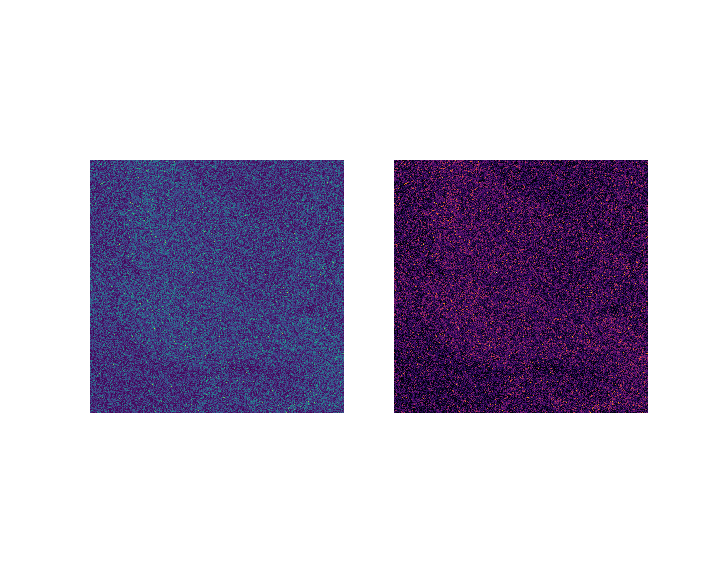

In [11]:
filename = 'images/10_1.3Mx_1x1us_4096px_mono100_0.05nAscreeni_50umC2_1.ser'

with nio.ser.fileSER(filename) as ser1:
        data, metadata = ser1.getDataset(0)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))

ax1.matshow(data)
ax2.matshow(data, cmap=plt.cm.inferno)

ax1.axis('off')
ax2.axis('off')

plt.show()

In [12]:
metadata

{'Calibration': ({'CalibrationOffset': -3.796594566051081e-08,
   'CalibrationDelta': 1.8538059404546294e-11,
   'CalibrationElement': 0},
  {'CalibrationOffset': -3.796594566051081e-08,
   'CalibrationDelta': 1.8538059404546294e-11,
   'CalibrationElement': 0}),
 'DataType': 2,
 'ArrayShape': [4096, 4096]}

In [13]:
# Filtering
import numpy as np
from scipy import ndimage

data_med = ndimage.median_filter(data, 3)

<IPython.core.display.Javascript object>


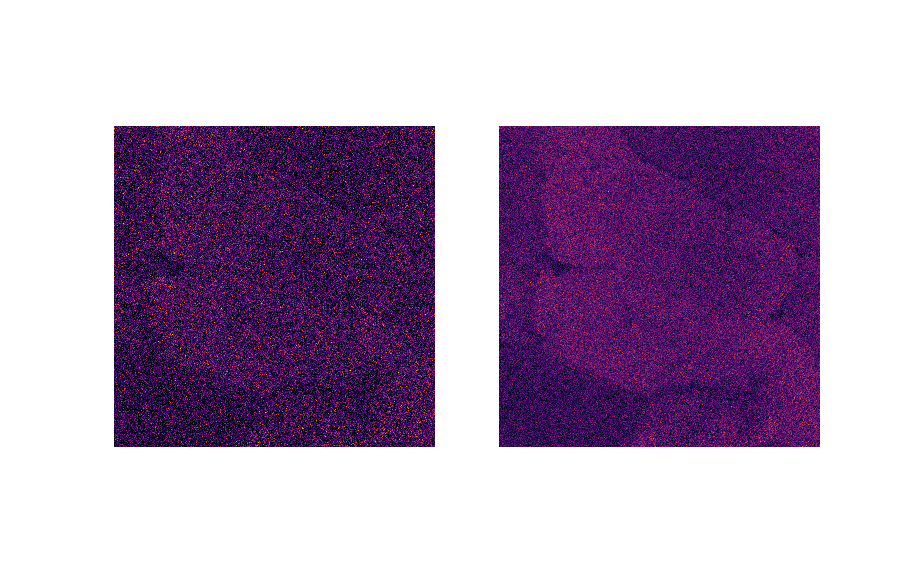

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))

ax1.matshow(data, cmap=plt.cm.inferno)
ax2.matshow(data_med, cmap=plt.cm.inferno)

ax1.axis('off')
ax2.axis('off')

plt.show()

In [15]:
from scipy import fftpack
data_fft = fftpack.fft2(data)
data_med_fft = fftpack.fft2(data_med)


# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

<IPython.core.display.Javascript object>


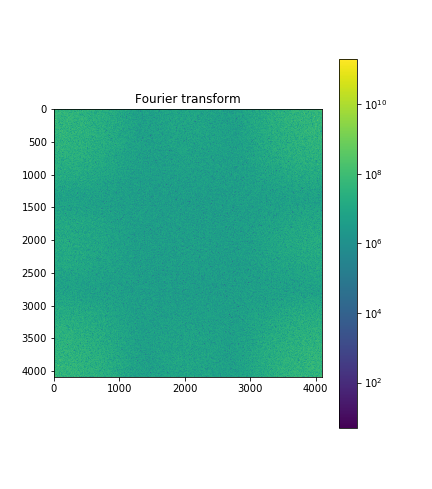

Text(0.5, 1.0, 'Fourier transform')

In [18]:
plt.figure()
plot_spectrum(data_med_fft,)
plt.title('Fourier transform')